In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install tensorflowjs

In [2]:
import tensorflow as tf
print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.8.0


In [3]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Capstone/Model/Project/data/C22-PS300.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('./data')
zip_ref.close()

In [4]:
base_dir = './data/C22-PS300'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training acne pictures
train_blackhead_dir = os.path.join(train_dir, 'blackhead')
train_folikulitis_dir = os.path.join(train_dir, 'folikulitis')
train_melasma_dir = os.path.join(train_dir, 'melasma')
train_nodules_dir = os.path.join(train_dir, 'nodules')
train_normalface_dir = os.path.join(train_dir, 'normalface')
train_papula_dir = os.path.join(train_dir, 'papula')
train_pustula_dir = os.path.join(train_dir, 'pustula')
train_rosacea_dir = os.path.join(train_dir, 'rosacea')
train_whitehead_dir = os.path.join(train_dir, 'whitehead')

# Directory with our validation acne pictures
validation_blackhead_dir = os.path.join(validation_dir, 'blackhead')
validation_folikulitis_dir = os.path.join(validation_dir, 'folikulitis')
validation_melasma_dir = os.path.join(validation_dir, 'melasma')
validation_nodules_dir = os.path.join(validation_dir, 'nodules')
validation_normalface_dir = os.path.join(validation_dir, 'normalface')
validation_papula_dir = os.path.join(validation_dir, 'papula')
validation_pustula_dir = os.path.join(validation_dir, 'pustula')
validation_rosacea_dir = os.path.join(validation_dir, 'rosacea')
validation_whitehead_dir = os.path.join(validation_dir, 'whitehead')

In [5]:
train_blackhead_fnames = os.listdir(train_blackhead_dir)
train_folikulitis_fnames = os.listdir(train_folikulitis_dir)
train_melasma_fnames = os.listdir(train_melasma_dir)
train_nodules_fnames = os.listdir(train_nodules_dir)
train_normalface_fnames = os.listdir(train_normalface_dir)
train_papula_fnames = os.listdir(train_papula_dir)
train_pustula_fnames = os.listdir(train_pustula_dir)
train_rosacea_fnames = os.listdir(train_rosacea_dir)
train_whitehead_fnames = os.listdir(train_whitehead_dir)

print(train_blackhead_fnames[:3])

['b1.jpg', 'b4.jpg', 'b21.jpg']


In [ ]:
print('total training blackhead images :', len(os.listdir(train_blackhead_dir)))
print('total training folikulitis images :', len(os.listdir(train_folikulitis_dir)))
print('total training melasma images :', len(os.listdir(train_melasma_dir)))
print('total training nodules images :', len(os.listdir(train_nodules_dir)))
print('total training normalface images :', len(os.listdir(train_normalface_dir)))
print('total training papula images :', len(os.listdir(train_papula_dir)))
print('total training pustula images :', len(os.listdir(train_pustula_dir)))
print('total training rosacea images :', len(os.listdir(train_rosacea_dir)))
print('total training whitehead images :', len(os.listdir(train_whitehead_dir)))

print('\ntotal validation blackhead images :', len(os.listdir(validation_blackhead_dir)))
print('total validation folikulitis images :', len(os.listdir(validation_folikulitis_dir)))
print('total validation melasma images :', len(os.listdir(validation_melasma_dir)))
print('total validation nodules images :', len(os.listdir(validation_nodules_dir)))
print('total validation normalface images :', len(os.listdir(validation_normalface_dir)))
print('total validation papula images :', len(os.listdir(validation_papula_dir)))
print('total validation pustula images :', len(os.listdir(validation_pustula_dir)))
print('total validation rosacea images :', len(os.listdir(validation_rosacea_dir)))
print('total validation whitehead images :', len(os.listdir(validation_whitehead_dir)))

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.ActivityRegularization(l1=0.0, l2=0.0),
    tf.keras.layers.Dropout(0.2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.ActivityRegularization(l1=0.0, l2=0.0),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.ActivityRegularization(l1=0.0, l2=0.0),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.ActivityRegularization(l1=0.0, l2=0.0),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax') 
])

In [ ]:
model.summary()

In [52]:
# from tensorflow.keras.optimizers import RMSprop
# (learning_rate=0.001)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen  = ImageDataGenerator(
      rescale = 1.0/255.,
      # rotation_range=40,
      # zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    shuffle=True,
                                                    batch_size=8,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    target_size=(64, 64))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         shuffle=True,
                                                         batch_size=5,
                                                         color_mode='rgb',
                                                         class_mode  = 'categorical',
                                                         target_size = (64, 64))


Found 632 images belonging to 9 classes.
Found 130 images belonging to 9 classes.


In [ ]:
validation_generator.class_indices

In [54]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.97):
      print('Good enough accuracy so cancelling training!')
      self.model.stop_training = True

callback = MyCallback()

In [58]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=79,
                              epochs=1000,
                              validation_steps=26,
                              verbose=2,
                              callbacks=[callback])

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


79/79 - 10s - loss: 0.9835 - accuracy: 0.6598 - val_loss: 1.5114 - val_accuracy: 0.5077 - 10s/epoch - 123ms/step
Epoch 2/1000
79/79 - 10s - loss: 0.9049 - accuracy: 0.6835 - val_loss: 1.3911 - val_accuracy: 0.5462 - 10s/epoch - 122ms/step
Epoch 3/1000
79/79 - 10s - loss: 1.1083 - accuracy: 0.6155 - val_loss: 1.6719 - val_accuracy: 0.4923 - 10s/epoch - 122ms/step
Epoch 4/1000
79/79 - 10s - loss: 1.0092 - accuracy: 0.6440 - val_loss: 1.5762 - val_accuracy: 0.5385 - 10s/epoch - 122ms/step
Epoch 5/1000
79/79 - 10s - loss: 1.0261 - accuracy: 0.6408 - val_loss: 1.4032 - val_accuracy: 0.5846 - 10s/epoch - 122ms/step
Epoch 6/1000
79/79 - 10s - loss: 1.0212 - accuracy: 0.6535 - val_loss: 1.5390 - val_accuracy: 0.5154 - 10s/epoch - 122ms/step
Epoch 7/1000
79/79 - 10s - loss: 1.0248 - accuracy: 0.6535 - val_loss: 1.3895 - val_accuracy: 0.5538 - 10s/epoch - 123ms/step
Epoch 8/1000
79/79 - 10s - loss: 1.0570 - accuracy: 0.6282 - val_loss: 1.4478 - val_accuracy: 0.5538 - 10s/epoch - 123ms/step
Epoch

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Training and validation loss')

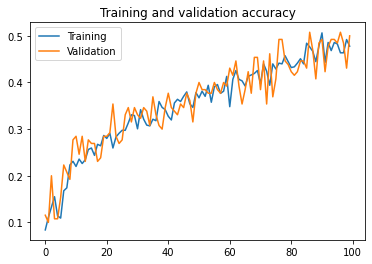

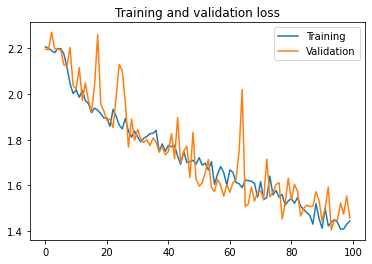

In [56]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  # print(fn)
  print(classes)

In [ ]:
#h5 model
saved_model_path = "/content/drive/MyDrive/Capstone/Model/Project/Hasil/Model.h5"

model.save(saved_model_path)

In [ ]:
!sudo pip install tensorflowjs

In [ ]:
#TensorFlow.js model
!tensorflowjs_converter --input_format=keras "/content/drive/MyDrive/Capstone/Model/Project/Hasil/Model.h5" /content/drive/MyDrive/Capstone/Model/Project/Hasil